# Спецификация к Лабораторной работе №8 

# Обработка матрицы. Разные алгоритмы.

# (Вариант 22)

## Абстракция А0
### 1. Постановка задачи.
#### Задание: 
Написать программу обработки матрицы в соответствии с условием. 

#### Условие: 
Проанализировать квадратную матрицу. 

Сформировать одномерный массив, равный по длине количеству строк матрицы и содержащий значения 0 или 1:

- 1, если в соответствующей строке элемент на главной диагонали больше других элементов этой строки;

- 0, если это условие для данной строки не выполняется.

Найти сумму элементов матрицы.

### 2. Уточненная постановка задачи.
Дана матрица B, состоящая из n строк и n столбцов.

Получить массив $X_1, X_2, ..., X_n$ по правилу:
    
$\large{\displaystyle{X_i = \begin{cases}
1, \ B_{ii} > B_{ij}, \ \forall j: 0<j<n+1 \land j \neq i\\
0, \ B_{ii} \leq B_{ij}, \ \forall j: 0<j<n+1 \land j \neq i\\
\end{cases}, \ \forall i: 0<i<n+1 }}$

Найти $\large{\displaystyle{S = \sum_{\substack{0<i<n+1 \\ 0<j<n+1}} B_{ij} }}$

### 3. Пример с иллюстрацией.

In [1]:
import numpy
import pylab 
%matplotlib inline
pylab.style.use('seaborn-whitegrid')

In [8]:
B1 = numpy.random.randint(-100,100, size=(5,5))
numpy.savetxt('B_Lab8_1.txt', B1, fmt='%5.0f')

In [12]:
B2 = numpy.random.randint(0,2, size=(5,5))
numpy.savetxt('B_Lab8_2.txt', B2, fmt='%5.0f')
B2

array([[0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 1, 1, 1],
       [1, 0, 1, 0, 1]])

In [19]:
B3 = numpy.random.randint(-10,10, size=(3,3))
numpy.savetxt('B_Lab8_3.txt', B3, fmt='%5.0f')
B3

array([[-1, -4, -5],
       [-7,  6, -4],
       [-3,  2, -6]])

In [22]:
B4 = numpy.random.randint(-10,0, size=(4,4))
numpy.savetxt('B_Lab8_4.txt', B4, fmt='%5.0f')
B4

array([[ -7, -10,  -3,  -3],
       [ -5,  -5,  -4,  -6],
       [ -1,  -1,  -4,  -6],
       [ -3,  -6, -10,  -8]])

In [25]:
B5 = numpy.random.randint(0,10, size=(4,4))
numpy.savetxt('B_Lab8_5.txt', B5, fmt='%5.0f')
B5

array([[3, 4, 7, 2],
       [2, 3, 9, 2],
       [3, 3, 8, 1],
       [0, 1, 5, 9]])

In [2]:
print(20*' ' + 'Лаб.8\n' + 90*'=')

fin = str(input('Текстовый файл с элементами матрицы B: '))
fout = str(input('Текстовый файл с элементами матрицы B, массива X и суммой элементов S: '))

print(90*'=' + '\n' + 'Исходная матрица B: \n')
B = numpy.loadtxt(fin, dtype='int')
print(B)

X = numpy.array(len(B) * [0])
for i in range(len(B)):
    c = numpy.argmax(B[i])
    X[i] = (c == i)
print(90*'=' + '\n' + 'Сформированный массив X: \n\n' + str(X))

S = numpy.sum(B)
print('\n' + 'Сумма элементов матрицы B: \n\n' + str(S))

with open(fout, 'w') as f:
    for i in range(len(B)):
        f.write("{}\n".format(B[i]))
    f.write("{}\n".format(X))
    f.write("{}\n".format(S))

                    Лаб.8
Текстовый файл с элементами матрицы B: B_Lab8_1.txt
Текстовый файл с элементами матрицы B, массива X и суммой элементов S: BXS_Lab8_1.txt
Исходная матрица B: 

[[ 43 -68 -21 -81  90]
 [  2 -86 -79 -66 -44]
 [-38 -66 -54 -80 -32]
 [-67  46 -71  99 -61]
 [ 63  14  -7 -42 -44]]
Сформированный массив X: 

[0 0 0 1 0]

Сумма элементов матрицы B: 

-650


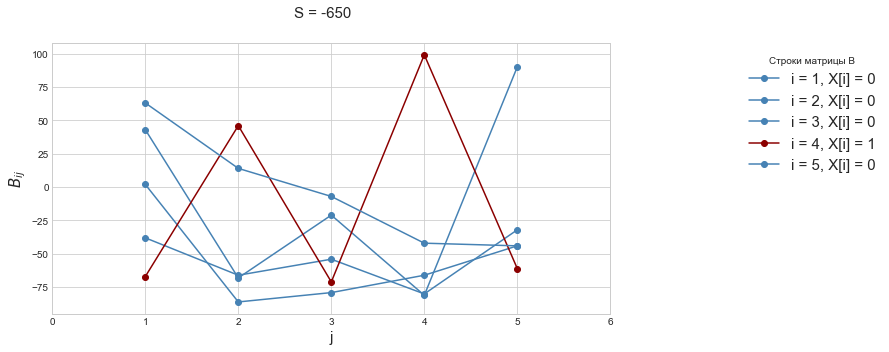

In [4]:
pylab.figure(figsize=(10,5))
col = ['steelblue', 'darkred']
for i in range(len(B)):
    pylab.plot(range(len(B[i])), B[i], '-o', c=col[X[i]], 
               label='i = ' + str(i+1) + ', X[i] = ' + str(X[i]))

pylab.suptitle('S = ' + str(S), fontsize=15)
pylab.xlabel('j', fontsize=15) 
pylab.ylabel(r'$B_{ij}$', fontsize=15)
pylab.xticks(range(-1, len(B)+1), range(len(B)+2));
pylab.legend(title='Строки матрицы B', fontsize=15, shadow=True, 
             bbox_to_anchor=(1.5,1.0));

### 4. Таблица данных 

| Класс | Имя | Описание (смысл, диапазон, точность) | Тип | Структура | Формат в/в |
| :-: | :-: | :-: | :-: | :-: | :-: |
| входные данные | fin | название текстового файла с элементами массива А | символ | строка | "+XX.txt" |
| входные данные | fout | название текстового файла с элементами массива А | символ | строка | "+XX.txt" |
| входные данные | B | вводимые из текстового файла числа исходной матрицы | цел | двумерный массив | +XX (:5) |
| выходные данные | X | выводимые в текстовый файл числа полученного массива | цел | одномерный массив | +XX (:5) |
| выходные данные | S | выводимая в текстовый файл сумма элементов матрицы | цел | простая переменная | +XX (:5) |
| промежуточные данные | i | индекс текущего элемента, 1≤i≤50 | цел | простая переменная | --- |
| промежуточные данные | j | индекс текущего элемента, 1≤j≤50 | цел | простая переменная | --- |
| промежуточные данные | c | индекс максимального элемента в строке, 1≤c≤50 | цел | простая переменная | --- |

_! в Delphi выход из цикла с 1 до 20 с шагом +1 происходит при значении 21, из цикла с 20 до 1 – при 0_

### 5. Входная форма
- обр 1.1 Текстовый файл с элементами массива B: $<fin>$       
- обр 1.2 Текстовый файл с элементами матрицы B, массива X и суммой элементов S: $<fout>$
- обр 2.1 Исходная матрица B:
- обр 2.2 $ < B[11] >  < B[12] >  …  < B[1n] > \\ ... \\ < B[n1] >  < B[n2] >  …  < B[nn] >$


### 6. Выходная форма

- обр 3 Лаб. 8
- обр 4.1 Текстовый файл с элементами массива B: $<fin>$       
- обр 4.2 Текстовый файл с элементами матрицы B, массива X и суммой элементов S: $<fout>$
- обр 5.1 Исходная матрица B:
- обр 5.2 $ < B[11] >  < B[12] >  …  < B[1n] > \\ ... \\ < B[n1] >  < B[n2] >  …  < B[nn] >$
- обр 6.1 Сформированный массив X:
- обр 6.2 $ < X[1] > < X[2] > … < X[n] > $
- обр 7.1 Сумма элементов матрицы B:
- обр 7.2 $ < S > $

### 7. Аномалии

-

### 8. Функциональные тесты

| Исходные данные | - | - | Результаты | - | Тест |
| :-: | :-: | :-: | :-: | :-: | :-: |
| fin | fout | B | X | S | № |
| B_Lab8_1.txt | BXS_Lab8_1.txt | `[[ 43 -68 -21 -81  90] [  2 -86 -79 -66 -44] [-38 -66 -54 -80 -32] [-67  46 -71  99 -61] [ 63  14  -7 -42 -44]]` | `[0 0 0 1 0]` | ` -650 ` | 1 | 
| - | - | - | - | - | - |
| B_Lab8_2.txt | BXS_Lab8_2.txt | `[[0 0 0 0 0] [1 0 1 1 0] [0 0 1 0 0] [1 0 1 1 1] [1 0 1 0 1]]` | `[1 0 1 0 0]` | `11` | 2 |
| - | - | - | - | - | - |
| B_Lab8_3.txt | BXS_Lab8_3.txt | `[[-1 -4 -5] [-7  6 -4] [-3  2 -6]]` | `[1 1 0]` | `-22` | 3 |
| - | - | - | - | - | - |
| B_Lab8_4.txt | BXS_Lab8_4.txt | `[[-7 -10 -3 -3] [-5 -5 -4 -6] [-1 -1 -4 -6] [-3 -6 -10 -8]]` | `[0 0 0 0]` | `-82` | 4 |
| - | - | - | - | - | - |
| B_Lab8_5.txt | BXS_Lab8_5.txt | `[[3 4 7 2] [2 3 9 2] [3 3 8 1] [0 1 5 9]]` | `[0 0 1 1]` | `62` | 5 |

| № теста | Входные  данные | - | - | Ожидаемый результат | - | Смысл теста |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| - | - | - | - | - | - | - |
| 1 | fin = 'B_Lab8_1.txt' | fout = 'BXS_Lab8_1.txt' |  B = `[[ 43 -68 -21 -81  90] [  2 -86 -79 -66 -44] [-38 -66 -54 -80 -32] [-67  46 -71  99 -61] [ 63  14  -7 -42 -44]]` | X = `[0 0 0 1 0]` | S = `-650` | Подтвердить правильность расчетов в случае матрицы 5х5 |
| - | - | - | - | - | - | - |
| 2 | fin = 'B_Lab8_2.txt' | fout = 'BXS_Lab8_2.txt' |  B = `[[0 0 0 0 0] [1 0 1 1 0] [0 0 1 0 0] [1 0 1 1 1] [1 0 1 0 1]]` | X = `[1 0 1 0 0]` | S = `11` | Протестировать простейший случай с бинарными значениями |
| - | - | - | - | - | - | - |
| 3 | fin = 'B_Lab8_3.txt' | fout = 'BXS_Lab8_3.txt' |  B = `[[-1 -4 -5] [-7  6 -4] [-3  2 -6]]` | X = `[1 1 0]` | S = `-22` | Протестировать случай квадратной матрицы 3х3 |
| - | - | - | - | - | - | - |
| 4 | fin = 'B_Lab8_4.txt' | fout = 'BXS_Lab8_4.txt' |  B = `[[-7 -10 -3 -3] [-5 -5 -4 -6] [-1 -1 -4 -6] [-3 -6 -10 -8]]` | X = `[0 0 0 0]` | S = `-82` | Подтвердить правильность расчетов в случае отрицательных чисел |
| - | - | - | - | - | - | - |
| 5 | fin = 'B_Lab8_5.txt' | fout = 'BXS_Lab8_5.txt' |  B = `[[3 4 7 2] [2 3 9 2] [3 3 8 1] [0 1 5 9]]` | X = `[0 0 1 1]` | S = `62` | Протестировать матрицу, состоящую из неотрицательных чисел |